In [ ]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
assets=['AMD','NFLX','AAPL','GOOG']

In [ ]:
weights= np.array([0.25,0.25,0.25,0.25])

In [ ]:
stockStartDate='2015-01-01'

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2023-10-19'

In [ ]:
df =pd.DataFrame()

for stock in assets:
    data = yf.download(stock, start=stockStartDate, end=today)
    df[stock] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df


,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,2.670000,49.848572,24.498684,26.168653
2015-01-05,2.660000,47.311428,23.808516,25.623152
2015-01-06,2.630000,46.501431,23.810759,25.029282
2015-01-07,2.580000,46.742859,24.144634,24.986401
2015-01-08,2.610000,47.779999,25.072325,25.065184
...,...,...,...,...
2023-10-12,108.790001,361.200012,180.710007,140.289993
2023-10-13,105.089996,355.679993,178.850006,138.580002
2023-10-16,106.459999,360.820007,178.720001,140.490005


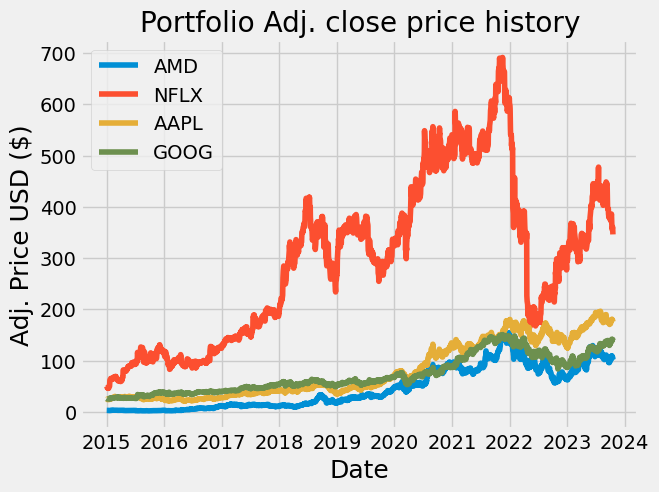

In [ ]:
title = 'Portfolio Adj. close price history'

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [ ]:
returns = df.pct_change()
returns

,AMD,NFLX,AAPL,GOOG
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.003745,-0.050897,-0.028172,-0.020846
2015-01-06,-0.011278,-0.017121,0.000094,-0.023177
2015-01-07,-0.019011,0.005192,0.014022,-0.001713
2015-01-08,0.011628,0.022188,0.038422,0.003153
...,...,...,...,...
2023-10-12,0.004432,-0.012926,0.005061,-0.009951
2023-10-13,-0.034011,-0.015282,-0.010293,-0.012189
2023-10-16,0.013036,0.014451,-0.000727,0.013783


In [ ]:
cov_matrix_annual =returns.cov()*252
cov_matrix_annual

,AMD,NFLX,AAPL,GOOG
AMD,0.360405,0.091080,0.075196,0.066114
NFLX,0.091080,0.202268,0.056562,0.060690
AAPL,0.075196,0.056562,0.085653,0.052293
GOOG,0.066114,0.060690,0.052293,0.081452


In [ ]:
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.09585299402625444

In [ ]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.3096013469386954

In [ ]:
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252

In [ ]:
portfolio_simple_annual_return

0.3532578558048514

In [ ]:
percent_var = str(round(port_variance,2)*100)+'%'
percent_vols = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 35.0%
Annual volatility/ risk: 31.0%
Annual variance: 10.0%


In [ ]:
!pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef= EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMD', 0.30459), ('NFLX', 0.04258), ('AAPL', 0.48156), ('GOOG', 0.17127)])
Expected annual return: 32.4%
Annual volatility: 31.5%
Sharpe Ratio: 0.97


(0.32428175193173836, 0.31497035563461484, 0.966064731135282)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights=cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AMD': 150, 'NFLX': 6, 'AAPL': 137, 'GOOG': 61}
Funds Remaining: $11.20


OrderedDict([('AMD', 1.00001), ('NFLX', 0.02519), ('AAPL', 0.9748), ('GOOG', -1.0)])
Expected annual return: 55.6%
Annual volatility: 66.3%
Sharpe Ratio: 0.81


(0.5561817110889723, 0.6634151111938581, 0.8082144980449403)

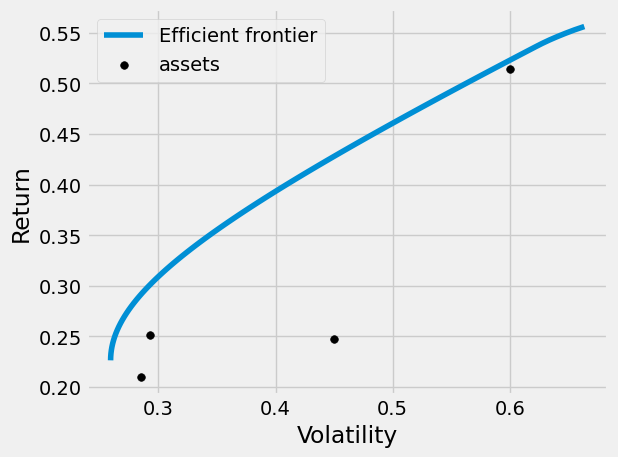

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef= EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
ef2 = EfficientFrontier(mu, S)
weights = ef2.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

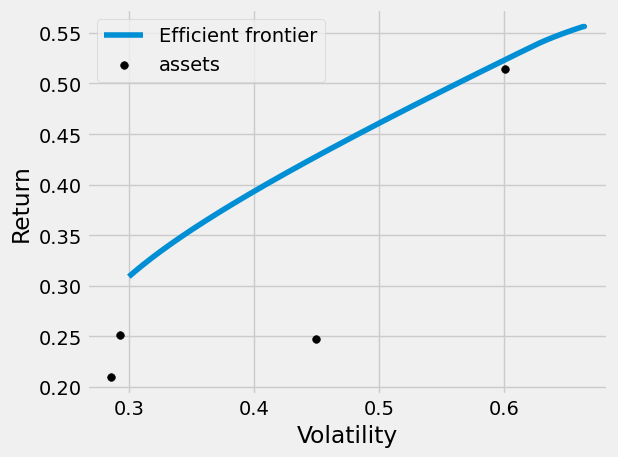

OrderedDict([('AMD', 1.0), ('NFLX', 0.0), ('AAPL', 1.0), ('GOOG', -1.0)])
Expected annual return: 55.6%
Annual volatility: 66.4%
Sharpe Ratio: 0.81


(0.5562959695759424, 0.6641455258051225, 0.8074976774492425)

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef= EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

risk_range=np.linspace(0.30,0.80,1000)
plotting.plot_efficient_frontier(ef,ef_param="risk",ef_param_range=risk_range,show_assets=True, showfig=True)
ef2 = EfficientFrontier(mu, S)
weights = ef2.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

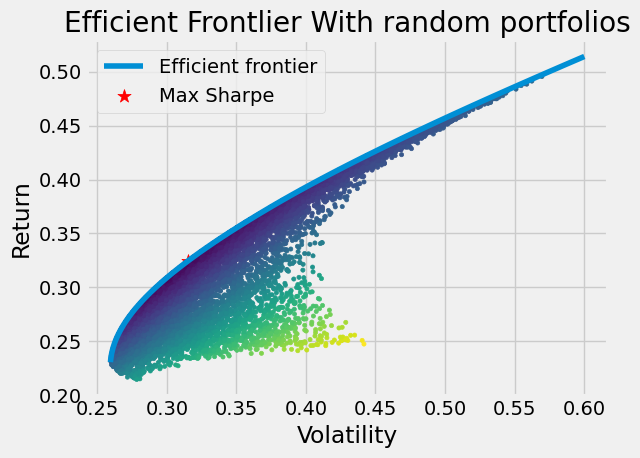

In [ ]:
from pandas.core.strings.accessor import StringMethods
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

ef=EfficientFrontier(mu,S)
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3]==1)

fig, ax= plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

ef3 = EfficientFrontier(mu, S)

ef3.max_sharpe()
ret_tangent, std_tangent, _ = ef3.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker ="*", s=100,c="r",label="Max Sharpe")

n_samples=10000
w=np.random.dirichlet(np.ones(len(mu)),n_samples)
rets = w.dot(mu)
stds =np.sqrt(np.diag(w @ S @ w.T))
sharpes =rets/stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

ax.set_title("Efficient Frontlier With random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()
